## Conll 2002 Data Analisys

Analisis of the dataset..


In [85]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [39]:

def read_words(filename):
    with open(filename, "r") as f:
        words = []
        i = 1
        for line in f:
            data = line.split()
            if len(data) > 0:
                words.append((i, data[0], data[1], data[2]))
            else:
                words.append((i, '<eol>', '', ''))
            i += 1
        return words

def get_phrases(words):
    phrases = []
    phrase = []
    i = 1
    for word in words:
        if word[1] == '<eol>':
            phrases.append((i, phrase))
            phrase = []
            i += 1
        else:
            phrase.append(word)
    return phrases


In [64]:
testa_words = read_words('conll2002/esp.testa')
testb_words = read_words('conll2002/esp.testb')
train_words = read_words('conll2002/esp.train')

testa_phrases = get_phrases(testa_words)
testb_phrases = get_phrases(testb_words)
train_phrases = get_phrases(train_words)

print("testa: {} words, {} phrases".format(len(testa_words), len(testa_phrases)))
print("testb: {} words, {} phrases".format(len(testb_words), len(testb_phrases)))
print("train: {} words, {} phrases".format(len(train_words), len(train_phrases)))

testa: 54838 words, 1915 phrases
testb: 53050 words, 1517 phrases
train: 273038 words, 8323 phrases


In [80]:
testa_words = read_words('conll2002/ned.testa')
testb_words = read_words('conll2002/ned.testb')
train_words = read_words('conll2002/ned.train')

testa_phrases = get_phrases(testa_words)
testb_phrases = get_phrases(testb_words)
train_phrases = get_phrases(train_words)

print("testa: {} words, {} phrases".format(len(testa_words), len(testa_phrases)))
print("testb: {} words, {} phrases".format(len(testb_words), len(testb_phrases)))
print("train: {} words, {} phrases".format(len(train_words), len(train_phrases)))

testa: 40656 words, 2895 phrases
testb: 74189 words, 5195 phrases
train: 218737 words, 15806 phrases


In [72]:
testa_phrases[0]

(1,
 [(1, 'Sao', 'NC', 'B-LOC'),
  (2, 'Paulo', 'VMI', 'I-LOC'),
  (3, '(', 'Fpa', 'O'),
  (4, 'Brasil', 'NC', 'B-LOC'),
  (5, ')', 'Fpt', 'O'),
  (6, ',', 'Fc', 'O'),
  (7, '23', 'Z', 'O'),
  (8, 'may', 'NC', 'O'),
  (9, '(', 'Fpa', 'O'),
  (10, 'EFECOM', 'NP', 'B-ORG'),
  (11, ')', 'Fpt', 'O'),
  (12, '.', 'Fp', 'O')])

In [83]:

def build_vocab(words):
    counter = collections.Counter()
    for word in words:
        if word[1] != '<eol>':
            counter[word[1]] += 1
    
    count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))
    words, _ = list(zip(*count_pairs))
    word_to_id = dict(zip(words, range(len(words))))

    return word_to_id, count_pairs


In [84]:
vocab, _ = build_vocab(testa_words + testb_words + train_words)
len(vocab)

35836

In [81]:

def count_clases(words):
    counter = collections.Counter()
    for word in words:
        if word[1] != '<eol>':
            counter[word[3]] += 1
    
    count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))

    return count_pairs


In [82]:
count_clases(train_words)

[('O', 183628),
 ('B-PER', 4716),
 ('B-MISC', 3336),
 ('B-LOC', 3208),
 ('I-PER', 2883),
 ('B-ORG', 2082),
 ('I-MISC', 1405),
 ('I-ORG', 1199),
 ('I-LOC', 467),
 ('N', 6),
 ('V', 1)]

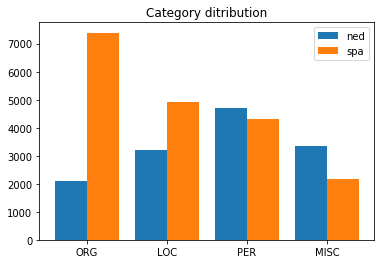

In [132]:

def subcategorybar(X, vals, legend, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    plt.legend(legend)


# | file       | ORG   | LOC   | PER   | MISC  |
# | ---------- | ----- | ----- | ----- | ----- |
# | ned.train  | 2082  | 3208  | 4716  | 3336  |
# | spa.train  | 7390  | 4913  | 4321  | 2173  |

ned = [2082, 3208, 4716, 3336]
spa = [7390, 4913, 4321, 2173]
    
plt.figure()
subcategorybar(['ORG', 'LOC', 'PER', 'MISC'], [ned, spa], ['ned', 'spa'])
plt.title('Category ditribution')
plt.show()